# TP 2 - DNN
## Travail fait par : Yasmine Gharbi et Arij Habbechi RT4/1

# I- Classification binaire :

## 1- Dataset :


Nous générons des données en utilisant la fonction make_circles() avec les paramètres suivants :

* Nombre d'échantillons dans le dataset : 1000.
* Bruit : Nous ajoutons un écart type de 0.03 d'un bruit gaussien aux données, ce qui les rend légèrement déformées et non parfaitement circulaires.


Pour assurer la reproductibilité des résultats, nous fixons le random_state à 42, ce qui garantit que les mêmes données seront générées à chaque exécution du code

In [ ]:
from sklearn.datasets import make_circles
# Créer des données avec make_circles()
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)


In [ ]:
# les dimensions du dataset :
X.shape, y.shape

((1000, 2), (1000,))

Les dimensions du dataset sont les suivantes :

* Dimension d'entrée : 2, car chaque point possède 2 caractéristiques (coordonnées dans l'espace 2D).
* Dimension de sortie : 1, car la sortie correspond à la classe à laquelle chaque point appartient.

*L'output (1000,) pour y.shape signifie qu'il y a un tableau d'une dimension contenant 1000 éléments. Chaque élément correspond à la classe de l'échantillon correspondant dans X. C'est à dire il y a 1000 labels, un pour chaque échantillon dans le dataset.*

In [ ]:
# Afficher les premières lignes des données pour vérification
print("Données X :\n", X[:5])
print("Étiquettes y :\n", y[:5])

Données X :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Étiquettes y :
 [1 1 1 1 0]


## Visualiser les donnees :

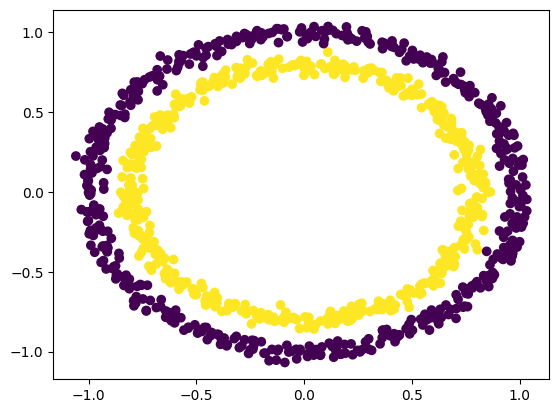

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y);

Le code ci-dessus trace les points de données, où X[:,0] et X[:,1] représentent respectivement les coordonnées x et y des points. c=y attribue des couleurs en fonction des étiquettes de classe, différenciant visuellement les deux classes.

**Résultat de la visualisation :**

Le tracé montre deux cercles concentriques de points dans des couleurs différentes (jaune et violet).

**Analyse :**

 Le dataset montre clairement deux cercles concentriques. Une fonction linéaire (comme une ligne droite) ne peut pas séparer ces deux classes car aucune ligne droite ne peut diviser le cercle intérieur du cercle extérieur sans classer incorrectement certains points. Ainsi, une fonction non linéaire est nécessaire pour classer correctement ces points dans leurs classes respectives.

##Repartition en train et test :

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## 2- Définition du modèle :

Nous importons les modules nécessaires de la bibliothèque Keras : Sequential et Dense. Sequential est utilisé pour créer un modèle de réseau de neurones de manière séquentielle, tandis que Dense est utilisé pour ajouter des couches de neurones densément connectées.


Nous initialisons un modèle Sequential, qui servira de conteneur pour les différentes couches que nous allons ajouter.



Nous ajoutons deux couches Dense au modèle :

* La première couche Dense comporte 5 neurones et utilise une fonction d'activation ReLU.
Cette couche est destinée à introduire de la non-linéarité dans le modèle.
* La deuxième couche Dense a un seul neurone et utilise également une activation ReLU. Cette couche est configurée comme la couche de sortie du modèle et est chargée de produire une seule valeur de sortie à partir des valeurs d'entrée reçues de la couche précédente.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Créer un nouveau modèle séquentiel
model = Sequential()

# Ajouter une couche entièrement connectée avec 5 neurones cachés
model.add(Dense(5, activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='relu'))

# Afficher un résumé du modèle
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Résumé du Modèle**

* dense_2 (Dense) : la première couche dense avec 5 neurones. Chaque neurone a 2 poids (un pour chaque caractéristique d'entrée) et 1 biais, totalisant 3 paramètres par neurone, soit 5 * 3 = 15 paramètres au total.
* dense_3 (Dense) : la deuxième couche dense avec 1 neurone. Ce neurone reçoit des entrées de chacun des 5 neurones de la couche précédente. Par conséquent, il possède 5 poids et 1 biais, totalisant 5 + 1 = 6 paramètres.
Total params : Le nombre total de paramètres dans le modèle est de 21, ce qui comprend tous les poids et biais des deux couches. Ces paramètres sont ce que le modèle apprendra pendant le processus d'entraînement.

##Compilation du modèle :

In [ ]:
from keras.optimizers import SGD

# Définir l'optimiseur SGD avec un taux d'apprentissage spécifié
sgd = SGD(lr=0.001)

# Compiler le modèle avec la fonction de perte d'entropie croisée binaire et l'optimiseur SGD
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

On définit d'abord l'optimiseur à utiliser pour entraîner le modèle. On choisit Stochastic Gradient Descent (SGD).  On définit son taux d'apprentissage à 0.001. Ce taux contrôle la taille des pas effectués pour ajuster les poids du modèle, avec un équilibre entre la convergence rapide et la stabilité de l'apprentissage.

**Compilation du Modèle :**

Pour compiler le modèle, on définit la fonction de perte à utiliser pendant l'entraînement. Dans ce cas, on choisit la fonction de perte binaire crossentropy, adaptée aux problèmes de classification binaire où l'on cherche à estimer des probabilités pour deux classes distinctes. On sélectionne également l'optimiseur SGD défini précédemment. Enfin, on spécifie la métrique d'évaluation à utiliser pendant l'entraînement, dans ce cas, la précision (accuracy), qui mesure la proportion de prédictions correctes parmi toutes les prédictions effectuées.

**Avantages et Contexte d'Application :**

L'utilisation de SGD comme optimiseur offre plusieurs avantages. Sa simplicité le rend facile à utiliser et à comprendre, et il offre un contrôle fin sur le processus d'apprentissage grâce à la possibilité de régler le taux d'apprentissage. Il est particulièrement adapté aux grands ensembles de données en raison de son efficacité en termes d'utilisation de la mémoire. La fonction de perte binaire crossentropy est bien adaptée aux tâches de classification binaire, comme la distinction entre les deux cercles concentriques dans l'exemple donné, en permettant de calculer la perte de manière appropriée en fonction de la distance entre les probabilités prédites et les étiquettes réelles.

##Entrainement du modèle :

In [ ]:
# Entrainer le modèle sur 100 époques avec affichage toutes les 10 époques
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
25/25 [==============================] - 0s 8ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 8/100
2

La valeur constante de la perte à travers toutes les époques indique que le modèle n'apprend pas des données. L'utilisation de la fonction d'activation ReLU dans la couche de sortie pourrait être inappropriée pour une tâche de classification binaire. ReLU produit des valeurs non négatives, ce qui pourrait ne pas convenir aux tâches nécessitant une sortie de probabilité entre 0 et 1.

## Evaluation du modèle :

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour tracer les frontières de décision
def plot_decision_boundary(model, X, y):
    # Définir les limites pour la grille
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Créer une grille de points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prédire les étiquettes de classe pour les points de la grille
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.round(Z).reshape(xx.shape)

    # Tracer le contour
    plt.contourf(xx, yy, Z, alpha=0.8)

    # Tracer les points d'entraînement
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='black')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

    plt.show()

5266/5266 [==============================] - 7s 1ms/step


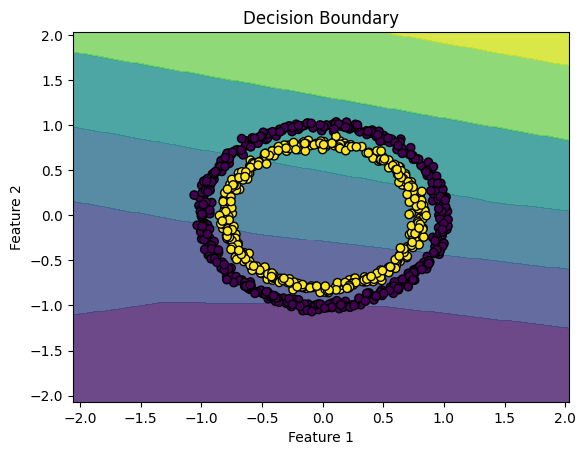

In [ ]:
# Tracer les frontières de décision pour l'ensemble d'entraînement
plot_decision_boundary(model, X_train, y_train)

5076/5076 [==============================] - 7s 1ms/step


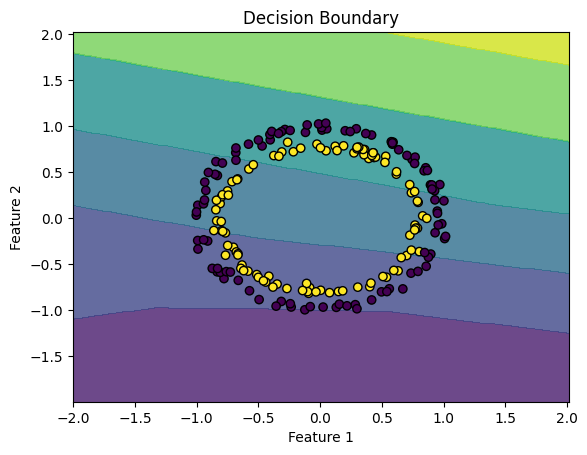

In [ ]:
non# Tracer les frontières de décision pour l'ensemble de test
plot_decision_boundary(model, X_test, y_test)

Pour tracer les frontières de décision, nous avons utilisé une fonction appelée plot_decision_boundary. Cette fonction a d'abord mis en place une grille sur laquelle les prédictions du modèle ont été effectuées. Ces prédictions ont été utilisées pour tracer les contours qui représentent les frontières de décision. Ensuite, les données réelles ont été superposées sur ces contours pour évaluer visuellement les performances du modèle.


Le modèle n'a pas progressé au cours de l'entrainement, cela suggère que le modèle ne parvient pas à apprendre des données.

Ceci peut etre optimisé par une augmentation par :
1. **Augmentation du nombre de couches ou de neurones** : Cette approche vise à accroître la capacité du modèle à apprendre des données en lui offrant une plus grande complexité pour capturer des relations plus subtiles.
2. **Changement de l'optimiseur** : En choisissant un optimiseur plus adapté, nous pouvons potentiellement améliorer la vitesse de convergence du modèle et sa capacité à trouver un minimum global, ce qui peut aider à surmonter la stagnation de l'entraînement.
3. **Un bon choix de la fonction d'activation**

## Optimisation :

Dans cette partie on va implémenter la première approche proposée :

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Créer un nouveau modèle séquentiel
model = Sequential()

# Ajouter une couche entièrement connectée avec 5 neurones cachés
model.add(Dense(5, activation='relu', input_shape=(2,)))
model.add(Dense(20, activation='relu' ))
model.add(Dense(20, activation='relu' ))
model.add(Dense(10, activation='relu' ))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))

# Afficher un résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 20)                120       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 886 (3.46 KB)
Trainable params: 886 (3.46 

In [ ]:
from keras.optimizers import SGD

# Définir l'optimiseur SGD avec un taux d'apprentissage spécifié
sgd = SGD(lr=0.001)

# Compiler le modèle avec la fonction de perte d'entropie croisée binaire et l'optimiseur SGD
model.compile(loss='binary_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [ ]:
# Entrainer le modèle sur 100 époques avec affichage toutes les 10 époques
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 13ms/step - loss: 1.2322 - accuracy: 0.4975 - val_loss: 0.6862 - val_accuracy: 0.5850
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5113 - val_loss: 0.6864 - val_accuracy: 0.5650
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5113 - val_loss: 0.6868 - val_accuracy: 0.5700
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5150 - val_loss: 0.6871 - val_accuracy: 0.5750
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5138 - val_loss: 0.6876 - val_accuracy: 0.5450
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6904 - accuracy: 0.5238 - val_loss: 0.6873 - val_accuracy: 0.5550
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6900 - accuracy: 0.5500 - val_loss: 0.6856 - val_accuracy: 0.5250
Epoch 8/100


In [ ]:
import tensorflow.keras.backend as K

# Effacer la session TensorFlow
K.clear_session()

5266/5266 [==============================] - 8s 1ms/step


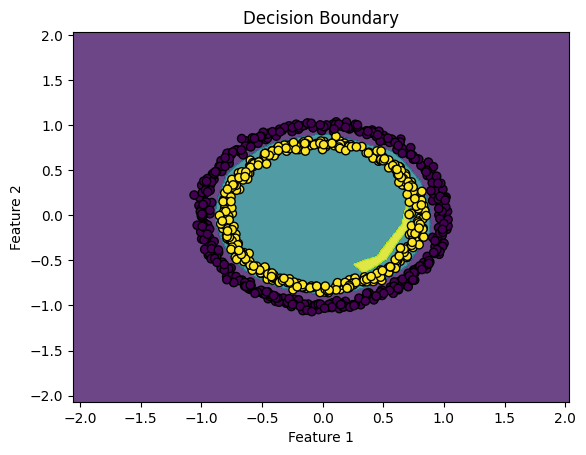

In [ ]:
# Tracer les frontières de décision pour l'ensemble d'entraînement
plot_decision_boundary(model, X_train, y_train)

5076/5076 [==============================] - 7s 1ms/step


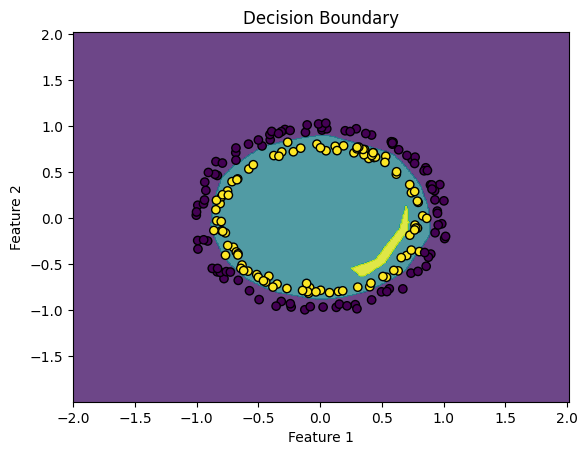

In [ ]:
# Tracer les frontières de décision pour l'ensemble de test
plot_decision_boundary(model, X_test, y_test)

* Complexité : on augmente la complexité du modèle en ajoutant plus de couches et de neurones. Cette architecture aide  à capturer de manière plus efficace les relations non linéaires dans la BD
* Performance d'Entraînement : La perte diminue considérablement de la première à la dernière époque, et la précision s'améliore significativement à la fois sur les ensembles d'entraînement et de validation, atteignant une classification presque parfaite à la fin de l'entraînement.

Analyse des Plots:

Les figures montrent une séparation précise et serrée entre les deux classes : les couches et les neurones supplémentaires ont permis au modèle d'apprendre une frontière de décision plus complexe, qui englobe mieux les subtilités de la BD.

 *Bien que le modèle performe exceptionnellement bien sur les ensembles d'entraînement et de test, la surveillance du surajustement est essentielle, surtout avec un modèle aussi complexe. Cependant, la forte précision de validation suggère que le modèle généralise bien.*

# La multi-Classification :

La bibliothèque Scikit-Learn nous permet de créer des données multi-classes à l’aide de la
méthode make-blobs(). Cette méthode créera le nombre de classes que nous voulons.

1. Créer des données multi-classes avec make-blobs(). Nous fixons les paramètres comme suit :
  * Nombre de classes : 4
  *  Nombre de features : 2
  *  Nombre d’échantillons dans le dataset : 1000

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Créer des données multi-classes avec make_blobs()
X, y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=42)

2. Diviser les données en ensembles d’apprentissage et de test

In [ ]:
# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train[:10]

array([1, 0, 2, 2, 0, 0, 0, 1, 3, 0])



3. Visualiser les données.

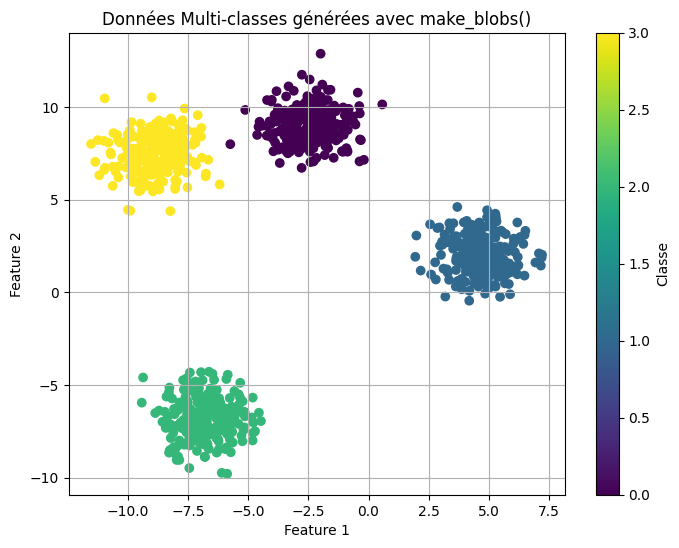

In [ ]:
# Afficher les données
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Données Multi-classes générées avec make_blobs()')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Classe')
plt.grid(True)
plt.show()

Le diagramme de dispersion nous aide à vérifier visuellement la séparabilité des données. Il montre clairement quatre clusters distincts. Chaque couleur représente une classe différente.

4.  Ce dataset nécessite une fonction linéaire ou non linéaire pour séparer ses classes ?
Justifier.



Ce dataset semble être linéairement séparable, ce qui signifie qu'une fonction linéaire pourrait suffire pour séparer efficacement ses classes. Les clusters  sont bien séparés les uns des autres, ce qui indique que des modèles linéaires  pourraient être appropriés. L'utilisation de fonctions non linéaires, pourrait introduire une complexité inutile, étant donné la clarté de la séparation observée.

5. Proposer une architecture basée sur FCNN pour la classification de ces données et la
développer.

**Modèle séquentiel :**

* Première couche : 10 neurones, activation ReLU.
* Deuxième couche : 20 neurones, activation ReLU.
* Couche de sortie : 4 neurones (un pour chaque classe), avec une activation softmax pour produire les probabilités de classe.

**Paramètres :**

Le modèle comporte un total de 334 paramètres entraînables, répartis entre les poids et les biais des couches.

**Compilation :**
* Optimiseur : 'adam'—un optimiseur de taux d'apprentissage adaptatif.
* Perte : 'sparse_categorical_crossentropy'—appropriée pour une classification multi-classe où les classes cibles sont des entiers.

In [ ]:
# Créer un nouveau modèle séquentiel
model = Sequential()

# Ajouter une couche entièrement connectée avec 5 neurones cachés
model.add(Dense(10, activation='relu', input_shape=(2,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))

# Afficher un résumé du modèle
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                30        
                                                                 
 dense_19 (Dense)            (None, 20)                220       
                                                                 
 dense_20 (Dense)            (None, 4)                 84        
                                                                 
Total params: 334 (1.30 KB)
Trainable params: 334 (1.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1. Couche dense (dense_18) :
  * Type de couche : Dense

  * Paramètres : 30
.
 Cette couche a 10 neurones, chacun étant connecté à chaque caractéristique en entrée. Il y a donc 10 * 2 = 20 poids, plus 10 biais, totalisant 30 paramètres.

  Cette couche utilise la fonction d'activation ReLU pour introduire de la non-linéarité dans le réseau.

2. Couche dense (dense_19) :
  * Type de couche : Dense
  * Paramètres : 220. Cette couche a 20 neurones, chacun étant connecté à chaque neurone de la couche précédente. Il y a donc 10 * 20 = 200 poids, plus 20 biais, totalisant 220 paramètres.

  Cette couche utilise également la fonction d'activation ReLU.

3. Couche dense (dense_20) :
  * Type de couche : Dense

  * Paramètres : 84. Cette couche a 4 neurones, chacun étant connecté à chaque neurone de la couche précédente. Il y a donc 20 * 4 = 80 poids, plus 4 biais, totalisant 84 paramètres.

  Cette couche utilise la fonction d'activation softmax pour produire des probabilités de classe pour les quatre classes

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

6. Entrainer le modèle et afficher les mesures de progression toutes les 10 époques, y
compris la perte, la précision, la perte de test et la précision de test.

In [ ]:
# Entrainer le modèle sur 100 époques avec affichage toutes les 10 époques
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 1.6377 - accuracy: 0.0188 - val_loss: 1.2070 - val_accuracy: 0.0800
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.9466 - accuracy: 0.5400 - val_loss: 0.7320 - val_accuracy: 0.7850
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.8888 - val_loss: 0.4505 - val_accuracy: 0.9200
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.3548 - accuracy: 0.9750 - val_loss: 0.2917 - val_accuracy: 0.9900
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.2313 - accuracy: 0.9937 - val_loss: 0.1933 - val_accuracy: 0.9950
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1531 - accuracy: 0.9987 - val_loss: 0.1235 - val_accuracy: 1.0000
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.1001 - accuracy: 0.9987 - val_loss: 0.0800 - val_accuracy: 1.0000
Epoch 8/100



L'entraînement est effectué sur 100 epochs, avec une taille de lot de 32. Les données de validation sont utilisées pour évaluer le modèle à chaque epoch.

 Une amélioration rapide de la précision est observée, atteignant une précision quasi-parfaite sur les ensembles d'entraînement et de validation. Cela indique que l'architecture et les paramètres du modèle conviennent bien à ce BD.

7. Afficher les métriques de classification (précision, rappel, score
F1, matrice de confusion) et expliquer l’utilité de chacune d’elles en interprétant les
résultats obtenus.

In [ ]:
# Prédictions de probabilité sur l'ensemble de test
y_pred_prob = model.predict(X_test)

# Convertir les probabilités en classes prédites
y_pred = np.argmax(y_pred_prob, axis=1)

7/7 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Calcul des différentes métriques de classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 0  0  0 57]]



**Interprétation de la sortie et métriques d'évaluation :**

Toutes les métriques - précision, rappel, score F1 - sont à leur maximum (1.0), ce qui indique une excellente performance pour toutes les classes.
Matrice de confusion : Classification parfaite sans aucune erreur de classification.

- Accuracy (Précision) : C'est le ratio des prédictions correctes sur le total des prédictions. Il indique globalement la précision du modèle dans la classification.
-Precision (Précision) : C'est le ratio des vrais positifs sur la somme des vrais positifs et des faux positifs. Il mesure la précision des prédictions positives du modèle.
-Recall (Rappel) : C'est le ratio des vrais positifs sur la somme des vrais positifs et des faux négatifs. Il mesure la capacité du modèle à trouver tous les exemples positifs.
-F1 Score : C'est la moyenne harmonique de la précision et du rappel. Il combine à la fois la précision et le rappel en une seule métrique.
-Matrice de Confusion : C'est une table qui montre le nombre de vrais positifs, de faux positifs, de vrais négatifs et de faux négatifs. Elle permet une visualisation détaillée des performances du modèle en fonction des différentes classes.

8. La (les) frontières(s) de décision pour les ensembles d’entrainement et de test.

In [ ]:
# Fonction pour tracer les frontières de décision avec la méthode predict
def plot_decision_boundary(model, X, y):
    # Définir les limites pour la grille
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Créer une grille de points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Prédire les probabilités des classes pour les points de la grille
    Z_probs = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_classes = np.argmax(Z_probs, axis=1)
    Z_classes = Z_classes.reshape(xx.shape)

    # Tracer le contour
    plt.contourf(xx, yy, Z_classes, alpha=0.8)

    # Tracer les points d'entraînement
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='black')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

    plt.show()


159917/159917 [==============================] - 242s 2ms/step


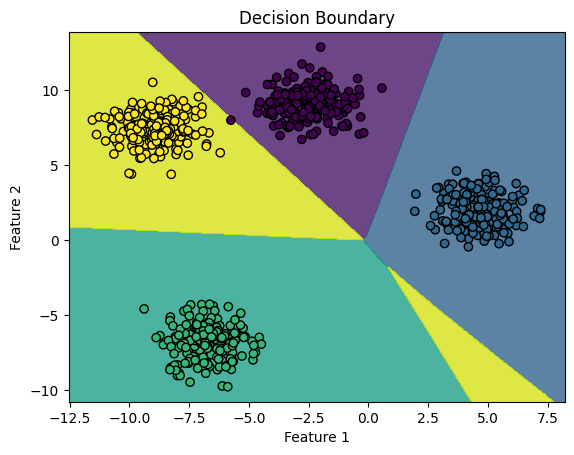

In [ ]:
# Tracer les frontières de décision pour l'ensemble d'entraînement
plot_decision_boundary(model, X_train, y_train)


134084/134084 [==============================] - 215s 2ms/step


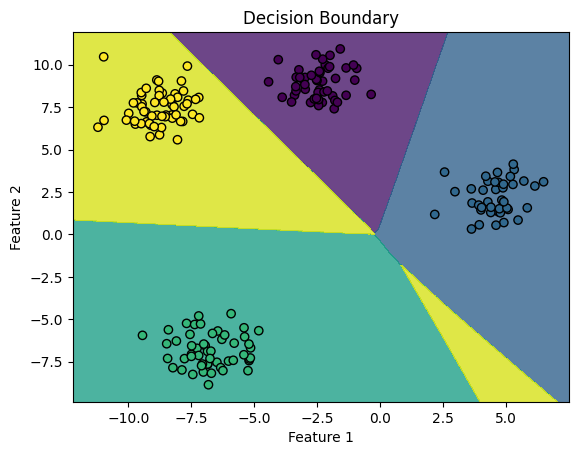

In [ ]:
# Tracer les frontières de décision pour l'ensemble de test
plot_decision_boundary(model, X_test, y_test)


Les tracés des frontières de décision montrent clairement la capacité du modèle à séparer efficacement les quatre classes. Chaque région est codée en couleur selon la classe, avec les points de données superposés par-dessus.

9. Etudier l’impact de l’augmentation du nombre d’échantillons dans le dataset sur
l’exactitude de classification, et afficher la courbe de la progression de l’exactitude de
classification en fonction du nombre d’échantillons dans le dataset.

2/2 [==============================] - 0s 6ms/step


3/3 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 3ms/step


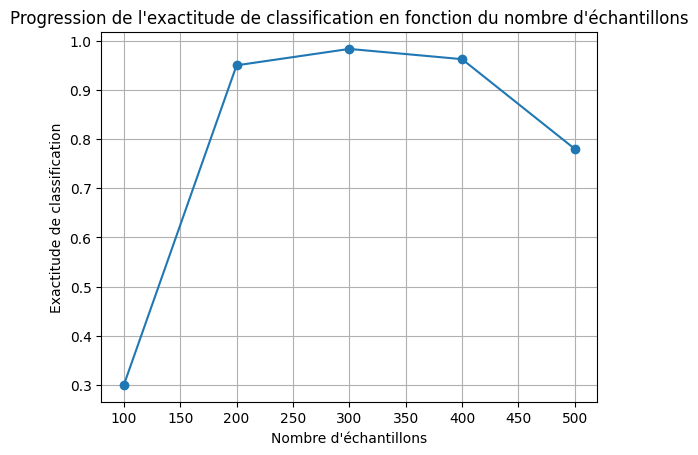

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_blobs

# Créer une fonction pour entraîner le modèle et calculer l'exactitude de classification
def train_and_evaluate(n_samples):
    # Générer un dataset avec le nombre d'échantillons spécifié
    X, y = make_blobs(n_samples=n_samples, n_features=2, centers=4, random_state=42)

    # Diviser le dataset en ensembles d'apprentissage et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Créer un modèle séquentiel simple
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(2,)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # Compiler le modèle
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Entraîner le modèle
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Prédire les classes pour l'ensemble de test
    y_pred = np.argmax(model.predict(X_test), axis=1)

    # Calculer l'exactitude de classification
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# Définir une liste de tailles de dataset à tester
sample_sizes = [100, 200, 300, 400, 500]

# Stocker les exactitudes de classification pour chaque taille de dataset
accuracies = []

# Iterer sur chaque taille de dataset et enregistrer l'exactitude de classification
for n_samples in sample_sizes:
    accuracy = train_and_evaluate(n_samples)
    accuracies.append(accuracy)

# Tracer la courbe de progression de l'exactitude de classification en fonction du nombre d'échantillons
plt.plot(sample_sizes, accuracies, marker='o')
plt.xlabel('Nombre d\'échantillons')
plt.ylabel('Exactitude de classification')
plt.title('Progression de l\'exactitude de classification en fonction du nombre d\'échantillons')
plt.grid(True)
plt.show()


On varie la taille de l'ensemble de données de 100 à 500 échantillons pour observer les changements dans la précision de classification.

**Résultats :**
Le graphique montre une augmentation de la précision avec plus d'échantillons, ce qui indique que le modèle bénéficie de plus de données mais atteint un plateau, suggérant des rendements décroissants avec des données supplémentaires au-delà d'un certain point.

Augmenter le nombre d'échantillons améliore généralement les performances du modèle, comme le montre le graphique de progression de la précision, mais il existe un point de saturation.
C'est comme un plafonnement des rendements, indiquant que le modèle atteint un niveau optimal de performance qui ne peut être amélioré de manière significative en ajoutant davantage de données.


Les scores constants de 1.0 pour la précision, le rappel et le score F1 dans les tests reflètent un scénario idéal, souvent non observé dans les données du monde réel, ce qui pourrait suggérer que l'ensemble de données synthétique manque de la complexité et du bruit généralement présents dans les ensembles de données naturels.